# Mini-lab 1: Zillow Dataset Logistic Regression and SVMs  
MSDS 7331 Data Mining - Section 403 - Mini Lab 1

Team: Ivelin Angelov, Yao Yao, Kaitlin Kirasich, Albert Asuncion

<a id="top"></a>
## Contents
* <a href="#Imports">Imports</a>
* <a href="#Models">Models</a>
* <a href="#Advantages">Advantages of Each Model</a>
* <a href="#Feature">Feature Importance</a>
* <a href="#Insights">Insights</a>
________________________________________________________________________________________________________

<a id="Imports"></a>

# Imports
We chose to use the same dataset from Lab 1. For origin and purpose of dataset as well as a detailed description of the dataset, refer to https://github.com/post2web/data_mining_group_project/blob/master/notebooks/lab1.ipynb.

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data, Create y and X
We will use the Zillow dataset from our previous lab, where the cleanup files were exported from lab 1 into mini-lab 1. Note that for logistic regression and support vector classifier models, we choose to use mostly complete continuous variables as well as create dummy variables for nominal variables to cross compare the performance, feature importance, and insights of each model. X is the training set and y is the test set, where we are testing if our models can accurately predict positive logerrror from that of negative. 

Data columns that are only available for the training set and not the test set (transaction date) were removed. Parcelid was removed because each individual property has its own ID and does not correlate well with regression or SVMs. The column that was created for "New Features" from Lab 1 (city and pricepersqft) were also removed for the sake of simplicity of only using original data for the prediction process.

In [9]:
# load datasets here:
variables = pd.read_csv('../datasets/variables.csv').set_index('name')
X = pd.read_csv('../datasets/train.csv', low_memory=False)

y = (X['logerror'] > 0).astype(np.int32)

del X['logerror']
del X['transactiondate']
del X['parcelid']
del X['city']
# TODO fix me
del X['price_per_sqft']

'The dataset has %d rows and %d columns' % X.shape

'The dataset has 116761 rows and 49 columns'

# Dealing with Nominal Data
Nominal data ususally have more than two values. For logistic regression and SVMs, we created dummy variables that only factor in 0s and 1s for the prediction process of logistic regression and SVMs.

In [10]:
nominal = variables[variables['type'].isin(['nominal'])]
nominal = nominal[nominal.index.isin(X.columns)]
nominal_data = X[nominal.index]

nominal_data = pd.get_dummies(nominal_data, drop_first=True)
nominal_data = nominal_data[nominal_data.columns[~nominal_data.columns.isin(nominal.index)]]

# Dealing with Continuous Data
StandardScaler from sklean was applied to the continuous data columns to standardize the dataset around center 0 with equal variance for creating normal distribtions prior to the application of logistic regressio and SVMs.

In [11]:
continuous = variables[~variables['type'].isin(['nominal'])]
continuous = continuous[continuous.index.isin(X.columns)]

X = X[continuous.index]
columns = X.columns

from sklearn.preprocessing import StandardScaler
# X = (X - µ) / σ

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X = pd.DataFrame(X, columns=columns)


## Merge data
The data was then merged for the application of logistic regression and SVM prediction. The following shows the final shape of the dataset after the application of dummy variables and StandardScaler.

# to do: question: i saw that the data was merged with dummy variables, but were the original nominal data deleted prior to the merge?

In [12]:
X = pd.concat([X, nominal_data], axis=1)
'The dataset has %d rows and %d columns' % X.shape

'The dataset has 116761 rows and 2107 columns'

<a id="Models"></a>
<a href="#top">Back to Top</a>
# Models

<b>[50 points]</b>

<i>
Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). <b>Adjust parameters of the models to make them more accurate</b>. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 
</i>

## Logistic Regression
For the logistic regression model, we created a function that took in X_train and Y_train from the original data set to test for X_test from the modified dataset. The accuracy of the logistic regression prediction for positive or negative logerror was compared with that of the original, where a confusion matrix was made to show percentage accuracy. Due to the complexity of the dataset, we are slightly better than 50% accuracy.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


def logistic_regression_model(**params):
    X_train = params['X_train']
    y_train = params['y_train']
    X_test = params['X_test']
    del params['X_train']
    del params['X_test']
    del params['y_train']
    
    # remove this if it freezes
    params['n_jobs'] = -1
    
    clf = LogisticRegression(**params)
    clf.fit(X_train, y_train)
    return clf.predict(X_test), clf

yhat, _ = logistic_regression_model(X_train=X, y_train=y, X_test=X)

accuracy = float(sum(yhat==y)) / len(y)
print('Percentage accuracy: %.12f' % (accuracy))

pd.DataFrame(confusion_matrix(y, yhat),
    columns=['Predicted 1', 'Predicted 0'], 
    index=['Actual 1', 'Actual 0'], 
)

Percentage accuracy: 0.59


,Predicted 1,Predicted 0
Actual 1,15442,36876
Actual 0,11477,52966


## Support Vector Machine Classifier
For the support vector machine model, we created a function that took in X_train and Y_train from the original data set to test for X_test from the modified dataset. The accuracy of the SVM prediction for positive or negative logerror was compared with that of the original, where a confusion matrix was made to show percentage accuracy. Due to the complexity of the dataset, we are slightly better than 50% accuracy.

In [14]:
from sklearn.svm import SVC, LinearSVC


def support_vector_machine_model(**params):
    params['max_iter'] = 1000
    X_train = params['X_train']
    y_train = params['y_train']
    X_test = params['X_test']
    del params['X_train']
    del params['X_test']
    del params['y_train']

    #clf = SVC(kernel='linear')
    clf = LinearSVC(**params)
    clf.fit(X_train, y_train)
    return clf.predict(X_test), clf

yhat, _ = support_vector_machine_model(X_train=X, y_train=y, X_test=X)

accuracy = float(sum(yhat==y)) / len(y)
print('Percentage accuracy: %.12f' % (accuracy))

pd.DataFrame(confusion_matrix(y, yhat),
    columns=['Predicted 1', 'Predicted 0'], 
    index=['Actual 1', 'Actual 0'], 
)

Percentage accuracy: 0.59


,Predicted 1,Predicted 0
Actual 1,15545,36773
Actual 0,11561,52882


## Performance
<i>
Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.
</i>

# Logistic Regression

For the logistic regression model, we ran 10 iterations of the 80/20 train/test split for the data set in order to find the C value that resulted in the highest accuracy for the prediction model. It looks like that a c value of 4.6 resulted in the highest prediction.

# to do: make the loop for 100 c values for better accuracy of parameters (maybe...takes too long)

Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57
Final average accuracy: 0.57


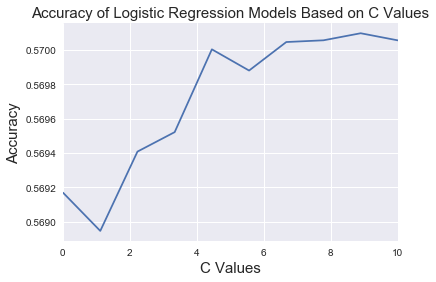

In [15]:
from sklearn.model_selection import train_test_split

n_splits = 5
accuracies = []
final_accuracies = {}

for C in np.linspace(.01, 10, 10):
    for i in range(n_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

        yhat, _ = logistic_regression_model(
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            C=C
        )
        
        accuracy = float(sum(yhat==y_test)) / len(y_test)
        accuracies.append(accuracy)

    print('Final average accuracy: %.12f' % (np.mean(accuracies)))
    final_accuracies[C] = np.mean(accuracies)
    
final_accuracies = pd.Series(final_accuracies)

plt.title('Accuracy of Logistic Regression Models Based on C Values', fontsize=15)
plt.xlabel('C Values', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

final_accuracies.plot();

For the logistic regression model, we further compared accuracy based on L1 or L2 penalty, where L1 is slightly more accurate than L2.

# to do: write a blurb about the difference between why we care about L1 vs L2

Final average accuracy for l1 : 0.57
Final average accuracy for l2 : 0.57


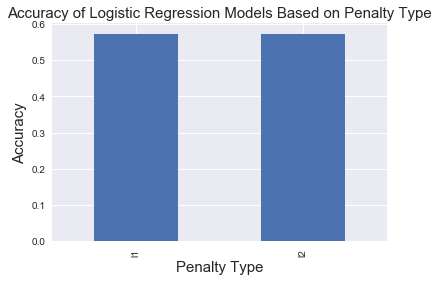

In [16]:
n_splits = 2
accuracies = []
final_accuracies = {}

for penalty in ['l1', 'l2']:
    for i in range(n_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

        yhat, _ = logistic_regression_model(
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            penalty=penalty
        )
        
        accuracy = float(sum(yhat==y_test)) / len(y_test)
        accuracies.append(accuracy)

    print('Final average accuracy for %s : %.12f' % (penalty, np.mean(accuracies)))
    final_accuracies[penalty] = np.mean(accuracies)
    
final_accuracies = pd.Series(final_accuracies)

plt.title('Accuracy of Logistic Regression Models Based on Penalty Type', fontsize=15)
plt.xlabel('Penalty Type', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

final_accuracies.plot(kind='bar');

# to do: evaluate performance for SVM

<a id="Advantages"></a>
<a href="#top">Back to Top</a>
## Advantages of Each Model
<b>[10 points]</b>

<i>
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail. 
</i>

# to do: write advantage after SVM performance parameters are found

<a id="Feature"></a>
<a href="#top">Back to Top</a>
## Feature Importance
<b>[30 points]</b>
    
<i>
Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?
</i>

# Logistic Regression Feature Importance

After scaling the continuous variables, the feature importance showed that propertyzoningdesc and propertycountylandusecode for multiple counties showed the most importance for predicting logerror. This might be due to the fact that neighborhoods based on location highly dictate the sales price of a property. Tax was also a big factor. Perhaps the more land owners pay for property tax could better predict property value because more amenities could be added for a richer neighborhood than that for a poorer.

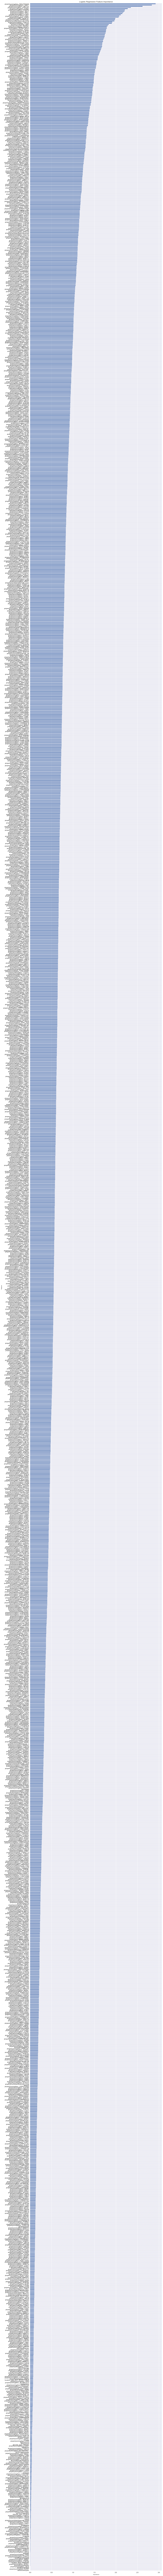

In [17]:
_, clf = logistic_regression_model(X_train=X, y_train=y, X_test=X, C=2)

index = pd.Index(X.columns, name='Variable Name')

importance = pd.Series(np.abs(clf.coef_[0]), index=index)
importance.sort()

fig, ax = plt.subplots(figsize=(15,300))
importance.plot(kind='barh', ax=ax)
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance', fontsize=8)
plt.ylabel('Feature', fontsize=8);

<a id="Insights"></a>
<a href="#top">Back to Top</a>
## Insights
<b>[10 points]</b>

<i>
Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model — then analyze the support vectors from the subsampled dataset. 
</i>

# Insights from SVM Model

We used support vectors for gradient descent to find the optimal accuracy of the SVM model.

In [18]:
clf = support_vector_machine_model(X_train=X, y_train=y, X_test=X, C=2)

# get support vectors
clf.support_vectors_
# get indices of support vectors
clf.support_ 
# get number of support vectors for each class
clf.n_support_ 

AttributeError: 'tuple' object has no attribute 'support_vectors_'

<a href="#top">Back to Top</a>
# References:

- Kernels from Kaggle competition: https://www.kaggle.com/c/zillow-prize-1/kernels
- Scikitlearn logistic regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Scikitlearn linear SVC: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- Stackoverflow pandas questions: https://stackoverflow.com/questions/tagged/pandas